In [45]:
%load_ext autoreload
%autoreload 2

from synchronization import plots
from synchronization import runner
from synchronization import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Baseline for Coupled EI Network

Characteristics of baseline for two coupled EI networks

* Both network have peak frequency around 30-60 Hz
* Both networks are relatively synchronized within
* All neurons in one network receive the same input. Mean input strength (in mV) is different between networks.
* Strong PING induced gamma rhythm (all neurons fire on each cycle)
* Intra-network connections stemming from pyramidal neurons should not produce directly spikes in target neurons in other network?
* TODO: weak PING (neurons do not fire on each cycle)!

The configuration below is the baseline for the coupled network configuration.
Each population shows high activity in the gamma frequency band produced by the PING mechanism.
Both populations are connected with each other sparsely by long-range synaptic connection stemming from excitatory neurons.
The `J_ppee`, `J_ppei` and `const_delay` parameter determine the influence both networks have on each other.
Additionally, we can also control the influence by the number of connections (`K_ppee`, `K_ppei`).

Observed Effects:

* 2 PINGs (one PING: E burst leads to I burst) after another and perfect synchronization if coupling between the two networks is too strong (J_pppe = 0.2)
* Some inhibitory neurons fire twice as they are being excited by excitatory neuron of other network (J_ppee = 0.01)
* Almost no inter-network effects observable (J_ppee = 0.001)


Parameter:

* const_delay is in ms
    * 4.0 ms is used by Buehlmann2010 to produce phase shift
* J_ppee: strength of E <-> E synapses
* J_ppei: strength of E -> I synapses


In [46]:
model = runner.run(
    modified_params={
    "runtime": 1000.0,
    "N_pop": 2,
    "J_ppee": 0.2,
    # increase from 0.1 to 0.2 increases mainly amplitude
    "J_ppei": 0.1,
    # if set to default of 0.1 this leads to strange split in frequency band
    "const_delay": 0.2,
    # different mean values to get different peak frequency of gamma rhythms
    "ou_mu_mean": [3.0, 5.0]
    },
    file_name="2-pop-base"
)

Initializing net ...
Initialization time: 0.4943528175354004s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
==== Network Run Finished ====
runtime: 8.8


In [47]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("2-pop-base")

(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x135baaf90>)

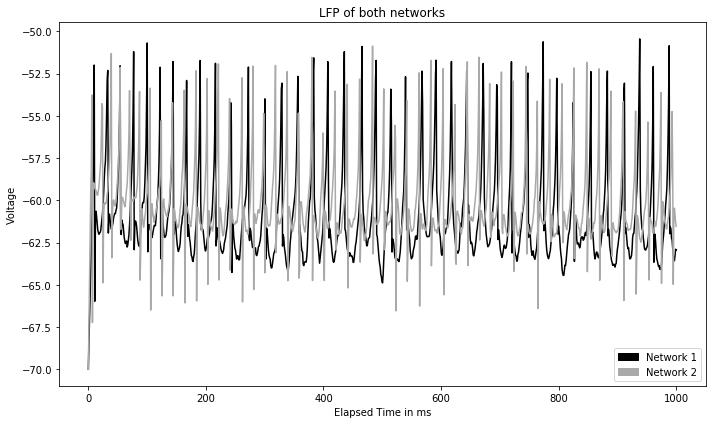

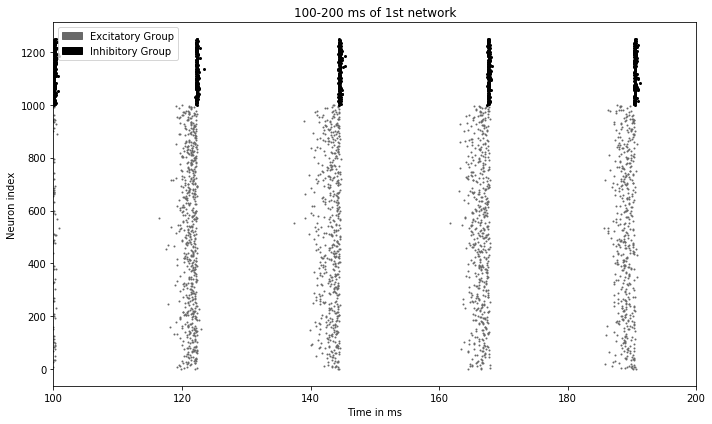

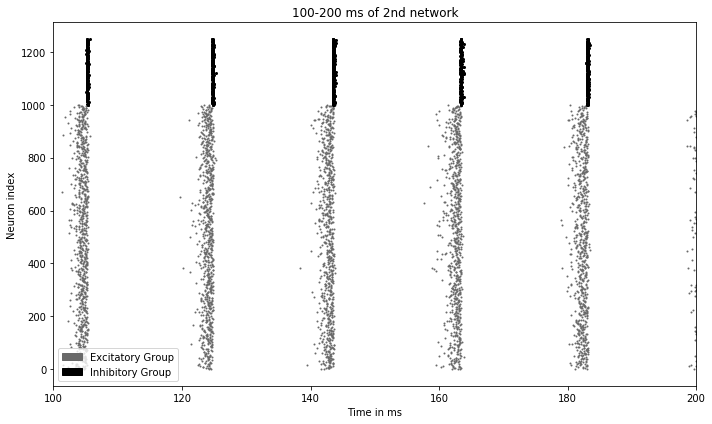

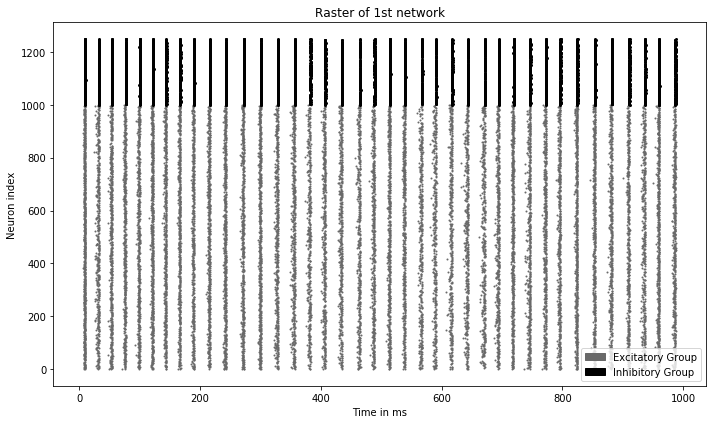

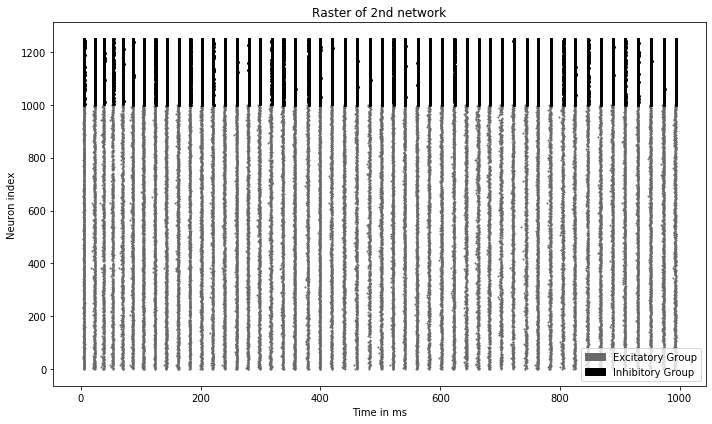

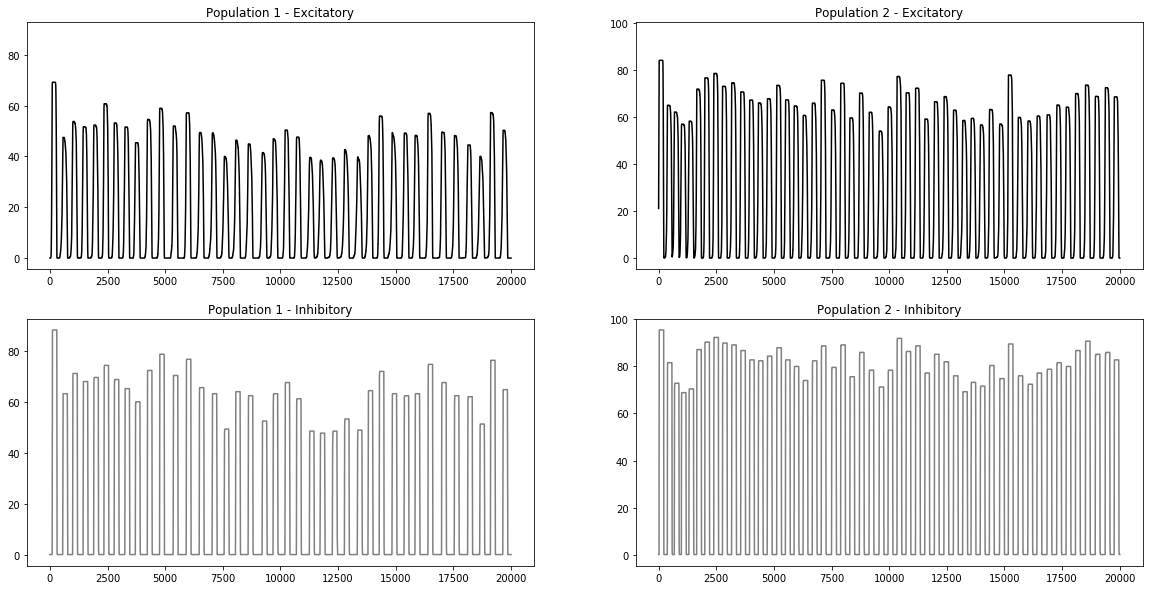

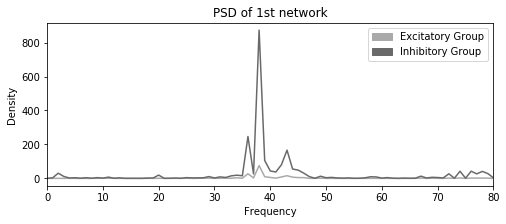

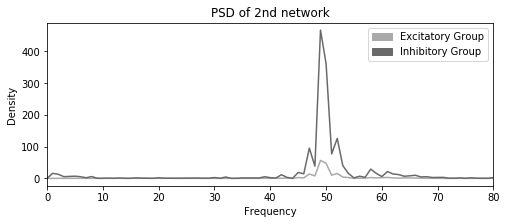

In [48]:
# plots.ou_noise_by_params(params=model["params"])

plots.lfp_nets(model)

plots.raster(title="100-200 ms of 1st network", model=model, x_left=100, x_right=200)
plots.raster(title="100-200 ms of 2nd network", model=model, x_left=100, x_right=200, population=2)

plots.raster(title="Raster of 1st network", model=model)
plots.raster(title="Raster of 2nd network", model=model, population=2)

# plots.lfp(title="Summed Voltage of 1st network", model=model)
# plots.lfp(title="Summed Voltage of 2nd network", model=model, population=2)

plots.population_rates(model)

plots.psd(model, title="PSD of 1st network")
plots.psd(model, title="PSD of 2nd network", population=2)
